# Segmenting and Clustering Neighborhoods in Toronto
---
Click [HERE](https://dataplatform.cloud.ibm.com/analytics/notebooks/v2/589dfff1-bc8c-404a-b289-0fdc063542a7/view?access_token=a0407923094430a2eacf5b88cf41d33ea2dc82f6519d2fa9fe927dfafcd7b6b8) to view my Jupyter Notebook.

---
## In this section we will download all of the dependencies necessary to scrape and transform the data.

In [4]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    openssl-1.1.1g             |       h516909a_1         2.1 MB  conda-forge
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0          conda-forge
    geopy:           

---
## In this section we will scrape the Canada table from Wikipedia and transform the data into a pandas dataframe.
*Note* - any Borough that had 'Not Assigned' as a value was removed from the displayed dataframe below.

In [5]:
 url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
 canada_wikipedia_data = pd.read_html(url)
 canada_wiki_df = canada_wikipedia_data[0]
 canada_df = canada_wiki_df[canada_wiki_df['Borough'] != 'Not assigned']
 canada_df

,Postal Code,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
8,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
9,M1B,Scarborough,"Malvern, Rouge"
11,M3B,North York,Don Mills
12,M4B,East York,"Parkview Hill, Woodbine Gardens"
13,M5B,Downtown Toronto,"Garden District, Ryerson"


In [6]:
canada_df.shape

(103, 3)

---
##  In this section we will get the latitude and the longitude coordinates of each neighborhood.
We will use the csv file that has the geographical coordinates of each postal code: http://cocl.us/Geospatial_data.

In [10]:
latitude_longitude_data = pd.read_csv('https://cocl.us/Geospatial_data')
latitude_longitude_data.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [11]:
canada_df_lat_lon = pd.merge(canada_df,latitude_longitude_data,on='Postal Code')
canada_df_lat_lon.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


---
## In this section we will explore and cluster the neighborhoods in Toronto after we have travered down to display only Toronto Boroughs.

In [23]:
canada_toronto = canada_df_lat_lon[canada_df_lat_lon['Borough'].str.contains('Toronto')]
canada_toronto.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
15,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
19,M4E,East Toronto,The Beaches,43.676357,-79.293031


---
## In this section we will visualize the Toronto Maps once we have retrieved the coordinates.

In [28]:
address = 'Toronto, ON'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [33]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[43.6534817, -79.3839347], zoom_start=11)

# add markers to map
for lat, lng, borough, neighbourhood in zip(canada_toronto['Latitude'], canada_toronto['Longitude'], canada_toronto['Borough'], canada_toronto['Neighbourhood']):
    label = '{}, {}'.format(neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

#### In case the above map did not load on Github here is a screenshot from the image rendering within my Jupyter Notebook:
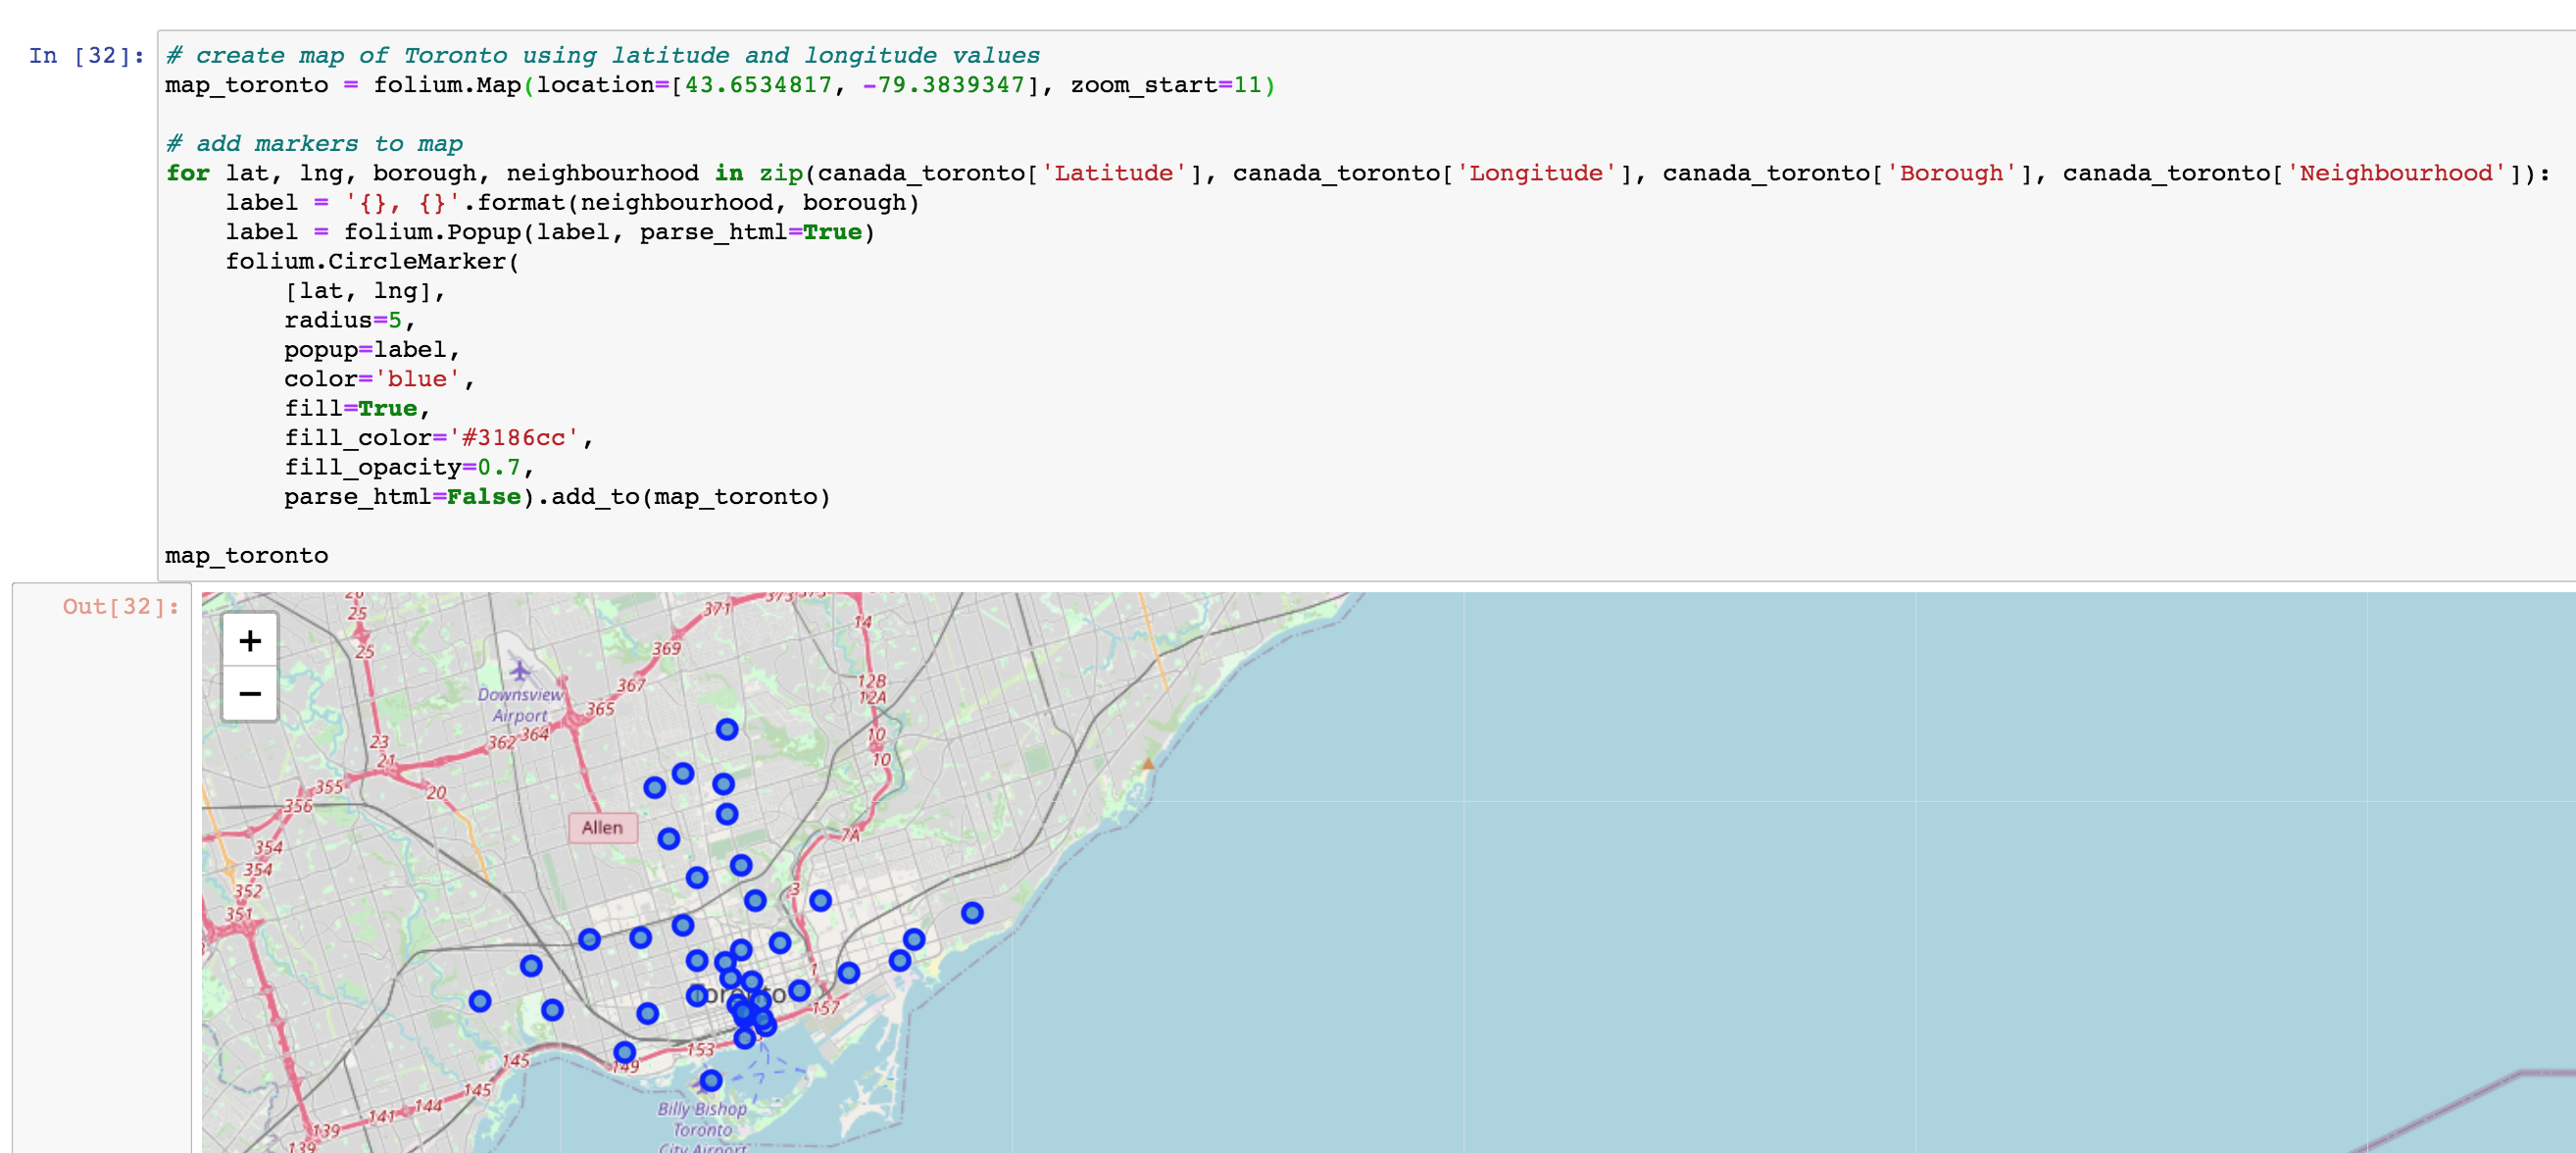

### Note - ignore this line [40] of code. Continue on to line [42]

In [40]:
from IPython.display import HTML
import random

def hide_toggle(for_next=False):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'

    toggle_text = 'Toggle show/hide'  # text shown on toggle link
    target_cell = this_cell  # target cell to control with toggle
    js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

    if for_next:
        target_cell = next_cell
        toggle_text += ' next cell'
        js_hide_current = this_cell + '.find("div.input").hide();'

    js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))

    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
            }}

            {js_hide_current}
        </script>

        <a href="javascript:{f_name}()">{toggle_text}</a>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text
    )

    return HTML(html)
hide_toggle(for_next=True)

In [35]:
CLIENT_ID = 'DZFLTKQI2NA5RUS0ZC4HGYN4K5E2UPZD2CQHSFWEVKIYAUJH' # your Foursquare ID
CLIENT_SECRET = 'KKJ2LCX54OQPCP12T13OINRTADXHERMVR4YW0BO15EMSOJIH' # your Foursquare Secret
VERSION = '20191210' # Foursquare API version

# defining radius and limit of venues to get
radius=500
LIMIT=10

---
# Foursquare API Section
## Explore neighborhoods in Toronto

In [43]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [46]:
toronto_venues = getNearbyVenues(names=canada_toronto['Neighbourhood'],
                                   latitudes=canada_toronto['Latitude'],
                                   longitudes=canada_toronto['Longitude']
                                  )
toronto_venues.head()

Regent Park, Harbourfront
Queen's Park, Ontario Provincial Government
Garden District, Ryerson
St. James Town
The Beaches
Berczy Park
Central Bay Street
Christie
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
The Danforth West, Riverdale
Toronto Dominion Centre, Design Exchange
Brockton, Parkdale Village, Exhibition Place
India Bazaar, The Beaches West
Commerce Court, Victoria Hotel
Studio District
Lawrence Park
Roselawn
Davisville North
Forest Hill North & West, Forest Hill Road Park
High Park, The Junction South
North Toronto West, Lawrence Park
The Annex, North Midtown, Yorkville
Parkdale, Roncesvalles
Davisville
University of Toronto, Harbord
Runnymede, Swansea
Moore Park, Summerhill East
Kensington Market, Chinatown, Grange Park
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
R

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Regent Park, Harbourfront",43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,"Regent Park, Harbourfront",43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,"Regent Park, Harbourfront",43.65426,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
3,"Regent Park, Harbourfront",43.65426,-79.360636,Impact Kitchen,43.656369,-79.356980,Restaurant
4,"Regent Park, Harbourfront",43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa


### Check how many venues were returned for each neighborhood

In [47]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Berczy Park,10,10,10,10,10,10
"Brockton, Parkdale Village, Exhibition Place",10,10,10,10,10,10
"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto",10,10,10,10,10,10
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",10,10,10,10,10,10
Central Bay Street,10,10,10,10,10,10
Christie,10,10,10,10,10,10
Church and Wellesley,10,10,10,10,10,10
"Commerce Court, Victoria Hotel",10,10,10,10,10,10
Davisville,10,10,10,10,10,10


### How many unique categories can be curated from all the returned venues

In [48]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 124 uniques categories.


# Analyze each neighbourhood

In [50]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Yoga Studio,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,American Restaurant,Antique Shop,Arts & Crafts Store,Asian Restaurant,Auto Workshop,BBQ Joint,Bakery,Bank,Bar,Beer Bar,Beer Store,Bookstore,Boutique,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Café,Candy Store,Caribbean Restaurant,Chinese Restaurant,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,Comic Shop,Concert Hall,Cosmetics Shop,Creperie,Cuban Restaurant,Dance Studio,Department Store,Dessert Shop,Diner,Distribution Center,Dog Run,Donut Shop,Eastern European Restaurant,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Food & Drink Shop,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Garden,Garden Center,Gastropub,Gay Bar,General Entertainment,Gift Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health Food Store,Historic Site,History Museum,Home Service,Hotel,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Liquor Store,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Organic Grocery,Park,Performing Arts Venue,Persian Restaurant,Pet Store,Pizza Place,Playground,Plaza,Portuguese Restaurant,Pub,Ramen Restaurant,Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Skate Park,Skating Rink,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Summer Camp,Supermarket,Sushi Restaurant,Swim School,Thai Restaurant,Theater,Theme Restaurant,Trail,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [51]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Yoga Studio,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,American Restaurant,Antique Shop,Arts & Crafts Store,Asian Restaurant,Auto Workshop,BBQ Joint,Bakery,Bank,Bar,Beer Bar,Beer Store,Bookstore,Boutique,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Café,Candy Store,Caribbean Restaurant,Chinese Restaurant,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,Comic Shop,Concert Hall,Cosmetics Shop,Creperie,Cuban Restaurant,Dance Studio,Department Store,Dessert Shop,Diner,Distribution Center,Dog Run,Donut Shop,Eastern European Restaurant,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Food & Drink Shop,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Garden,Garden Center,Gastropub,Gay Bar,General Entertainment,Gift Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health Food Store,Historic Site,History Museum,Home Service,Hotel,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Liquor Store,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Movie Theater,Museum,Music Venue,New American Restaurant,Organic Grocery,Park,Performing Arts Venue,Persian Restaurant,Pet Store,Pizza Place,Playground,Plaza,Portuguese Restaurant,Pub,Ramen Restaurant,Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Skate Park,Skating Rink,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Summer Camp,Supermarket,Sushi Restaurant,Swim School,Thai Restaurant,Theater,Theme Restaurant,Trail,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Berczy Park,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,0.000000,0.000,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.1,0.000000,0.0,0.0,0.100000,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.1,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.00,0.1,0.0,0.0,0.00,0.1,0.0
1,"Brockton, Parkdale Village, Exhibition Place",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.1,0.0,0.0,0.0,0.0,0.100,0.0,0.0,0.0,0.0,0.00,0.1,0.0,0.0,0.0,0.1,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.100000,0.0,0.0,0.00,0.0,0.0,0.000000,0.000,0.0,0.0,0.1,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.1,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0
2,"Business reply mail Processing Centre, South C...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.1,0.0,0.0,0.1,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.1,0.1,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000000,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,0.000000,0.000,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.1,0.00,0.0,0.0,0.00,0.0,0.1,0.0,0.0,0.000,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0
3,"CN Tower, King and Spadina, Railway Lands, Har...",0.0,0.1,0.1,0.1,0.2,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.1,0.000,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.1,0.00,0.0,0.0,0.000000,0.000,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.

In [52]:
toronto_grouped.shape

(39, 124)

### Let's print each neighborhood along with the top 5 most common venues

In [53]:
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Berczy Park----
             venue  freq
0             Park   0.1
1  Thai Restaurant   0.1
2         Beer Bar   0.1
3       Restaurant   0.1
4     Liquor Store   0.1


----Brockton, Parkdale Village, Exhibition Place----
                venue  freq
0         Coffee Shop   0.2
1              Bakery   0.1
2  Italian Restaurant   0.1
3           Pet Store   0.1
4        Climbing Gym   0.1


----Business reply mail Processing Centre, South Central Letter Processing Plant Toronto----
                  venue  freq
0            Skate Park   0.1
1         Garden Center   0.1
2  Fast Food Restaurant   0.1
3         Burrito Place   0.1
4            Restaurant   0.1


----CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport----
                venue  freq
0      Airport Lounge   0.2
1         Coffee Shop   0.1
2                 Bar   0.1
3  Airport Food Court   0.1
4        Airport Gate   0.1


----Central Bay Street----
                  

### Let's put that into a *pandas* dataframe
First, let's write a function to sort the venues in descending order.

In [54]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [55]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,French Restaurant,Farmers Market,Park,Liquor Store,Concert Hall,Restaurant,Beer Bar,Museum,Thai Restaurant,Vegetarian / Vegan Restaurant
1,"Brockton, Parkdale Village, Exhibition Place",Coffee Shop,Climbing Gym,Gym,Bar,Bakery,Italian Restaurant,Café,Pet Store,Breakfast Spot,Cuban Restaurant
2,"Business reply mail Processing Centre, South C...",Burrito Place,Pizza Place,Skate Park,Brewery,Farmers Market,Auto Workshop,Fast Food Restaurant,Restaurant,Garden Center,Comic Shop
3,"CN Tower, King and Spadina, Railway Lands, Har...",Airport Lounge,Airport,Airport Food Court,Airport Gate,Airport Service,Coffee Shop,Boutique,Bar,Harbor / Marina,Vietnamese Restaurant
4,Central Bay Street,Coffee Shop,Gastropub,Modern European Restaurant,Middle Eastern Restaurant,Ramen Restaurant,Japanese Restaurant,Italian Restaurant,Dessert Shop,College Gym,Comic Shop


---
# Cluster the neighborhoods with K-Means

In [61]:
k=5
toronto_clustering = canada_toronto.drop(['Postal Code','Borough','Neighbourhood'],1)
kmeans = KMeans(n_clusters = k,random_state=0).fit(toronto_clustering)
kmeans.labels_
canada_toronto.insert(0, 'Cluster Labels', kmeans.labels_)

ValueError: cannot insert Cluster Labels, already exists

In [62]:
canada_toronto

,Cluster Labels,Postal Code,Borough,Neighbourhood,Latitude,Longitude
2,0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
4,0,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
9,0,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
15,0,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
19,4,M4E,East Toronto,The Beaches,43.676357,-79.293031
20,0,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
24,0,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
25,3,M6G,Downtown Toronto,Christie,43.669542,-79.422564
30,0,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568
31,1,M6H,West Toronto,"Dufferin, Dovercourt Village",43.669005,-79.442259


In [64]:
# create map
map_clusters = folium.Map(location=[43.6534817, -79.3839347],zoom_start=11)

# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, neighbourhood, cluster in zip(canada_toronto['Latitude'], canada_toronto['Longitude'], canada_toronto['Neighbourhood'], canada_toronto['Cluster Labels']):
    label = folium.Popup(' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## In case the above map does not render in Github, below is a screenshot of the image rendering that I am seeing currently.
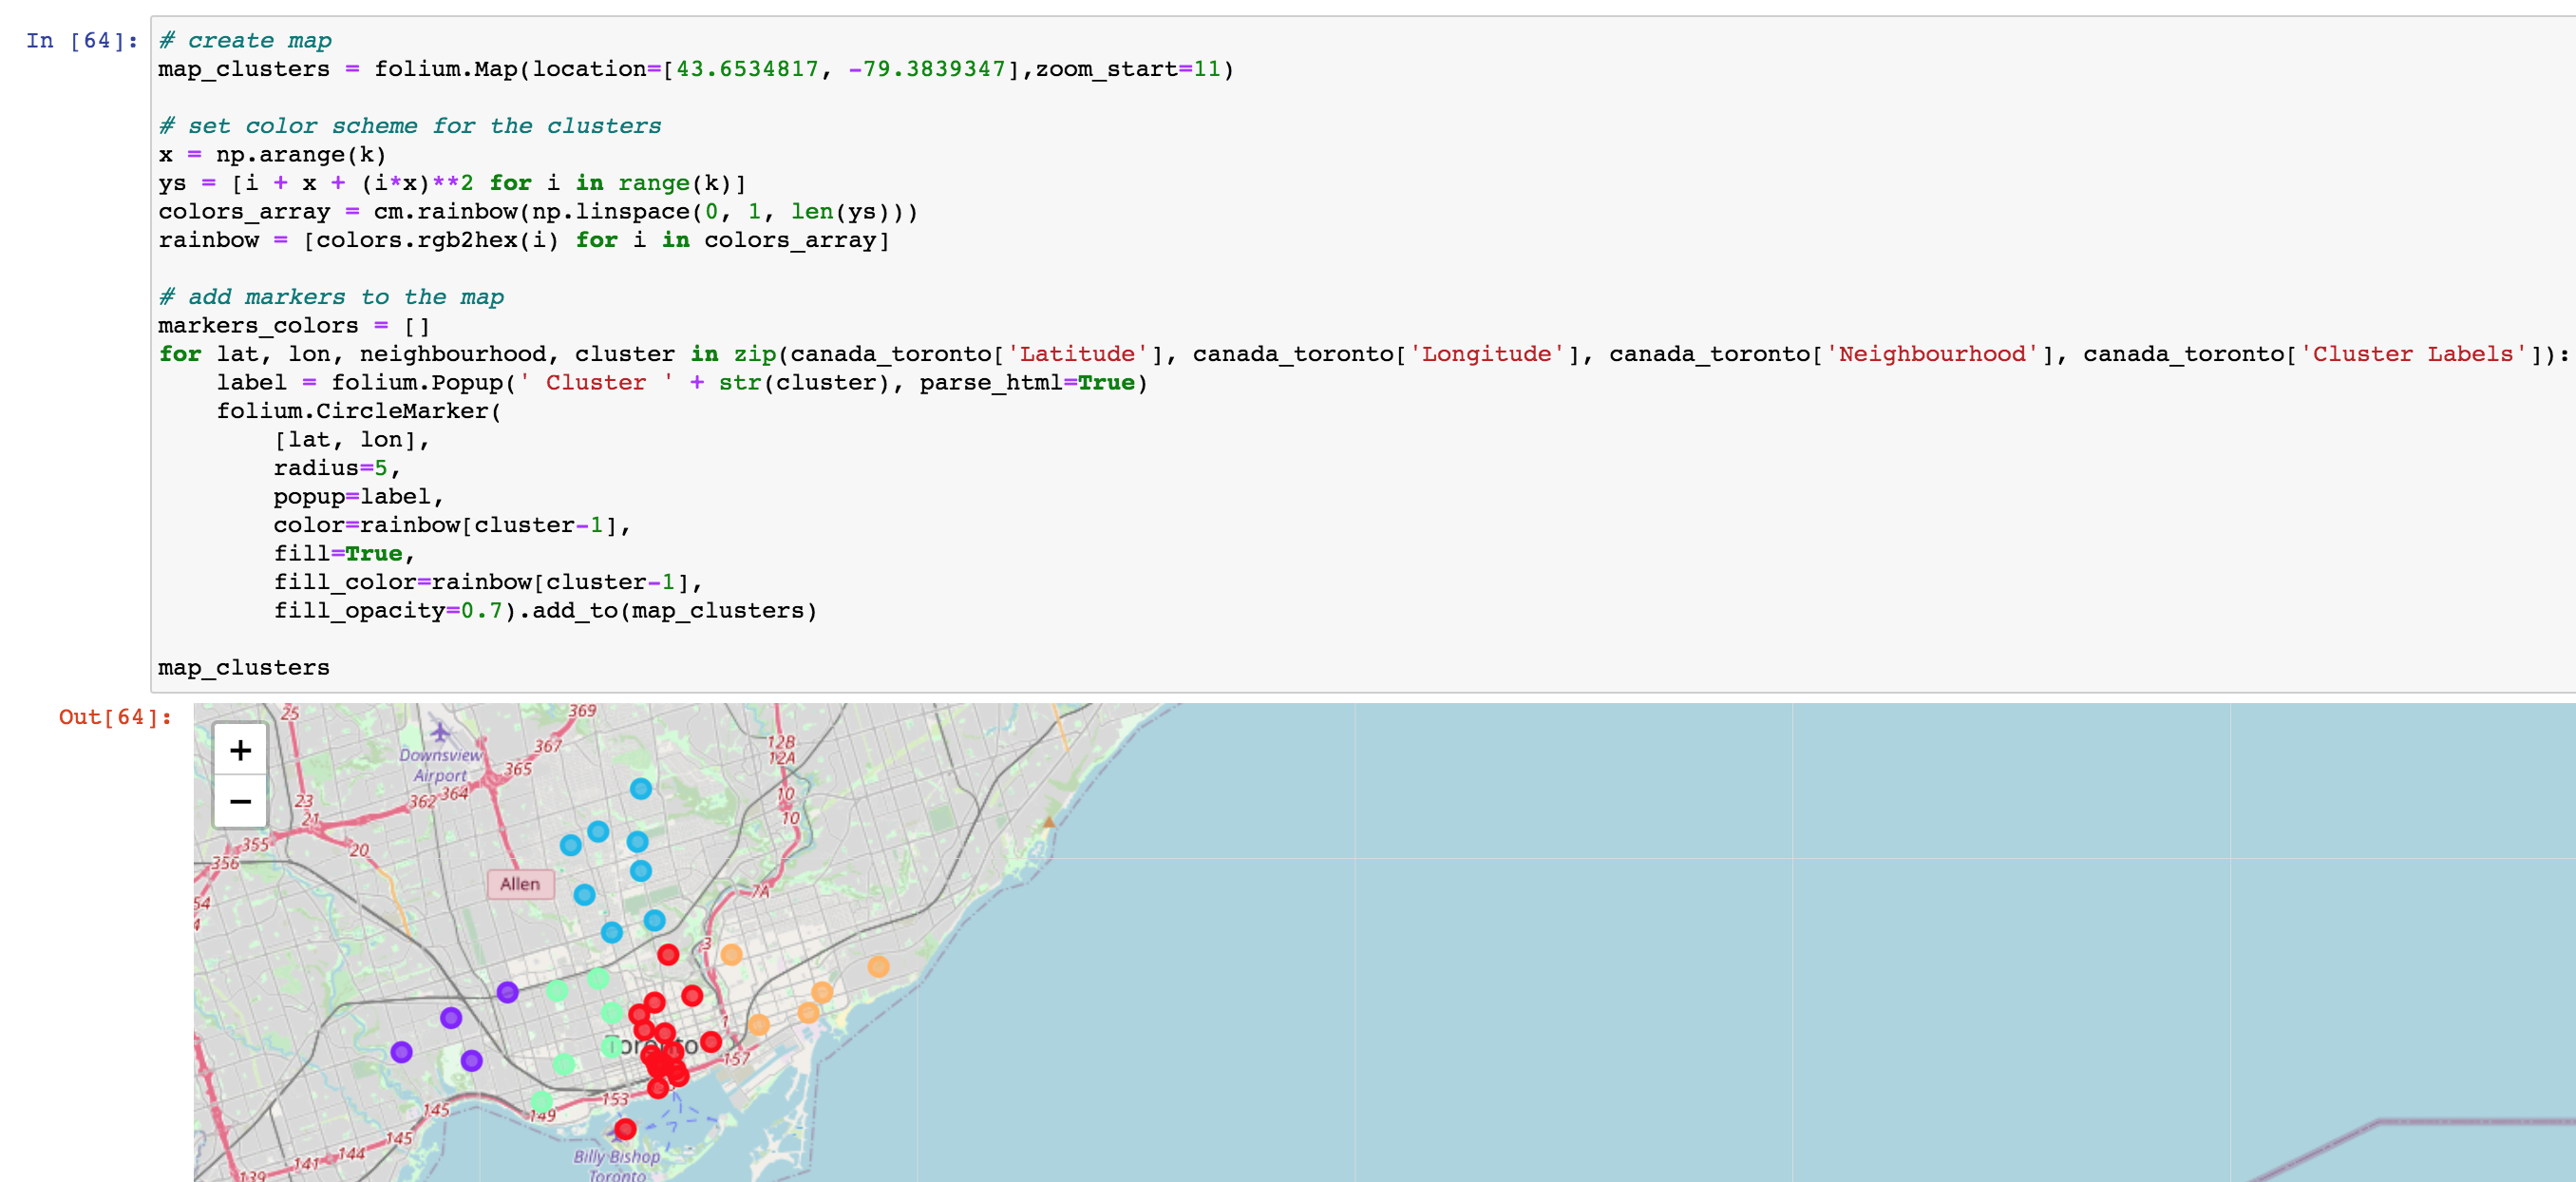

---
# Examine Cluters

## Cluster 1

In [65]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Postal Code,Longitude
2,M5A,-79.360636
4,M7A,-79.389494
9,M5B,-79.378937
15,M5C,-79.375418
20,M5E,-79.373306
24,M5G,-79.387383
30,M5H,-79.384568
36,M5J,-79.381752
42,M5K,-79.381576
48,M5L,-79.379817


## Cluster 2

In [66]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Postal Code,Longitude
31,M6H,-79.442259
69,M6P,-79.464763
75,M6R,-79.456325
81,M6S,-79.484450


## Cluster 3

In [67]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Postal Code,Longitude
61,M4N,-79.388790
62,M5N,-79.416936
67,M4P,-79.390197
68,M5P,-79.411307
73,M4R,-79.405678
79,M4S,-79.388790
83,M4T,-79.383160
86,M4V,-79.400049


## Cluster 4

In [68]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Postal Code,Longitude
25,M6G,-79.422564
37,M6J,-79.419750
43,M6K,-79.428191
74,M5R,-79.405678
80,M5S,-79.400049
84,M5T,-79.400049


## Cluster 5

In [69]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Postal Code,Longitude
19,M4E,-79.293031
41,M4K,-79.352188
47,M4L,-79.315572
54,M4M,-79.340923
100,M7Y,-79.321558
